# Clustering

## KMeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
ds = pd.read_csv("Mall_Customers.csv")

In [3]:
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
X = ds[ds.columns[3:5]].values

##  Plot to get a better understanding

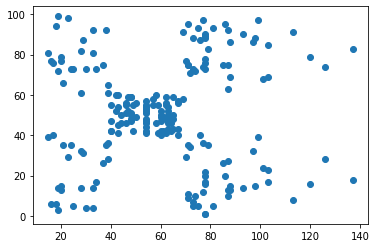

In [6]:
plt.scatter(ds.iloc[:,3],ds.iloc[:,4])

We can observe that the data is of Clustering.

## Elbow Method

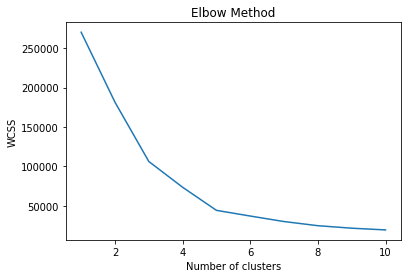

In [7]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

We can clearly see that the elbow joint is at 5. so there are 5 Clusters in the given data set.

### Applying K-Means Algorithm

In [8]:
# Fitting K-Means Clustering to teh dataset
kmeans = KMeans(n_clusters=5,init="k-means++", random_state=42)
y_predict  = kmeans.fit_predict(X)
y_predict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

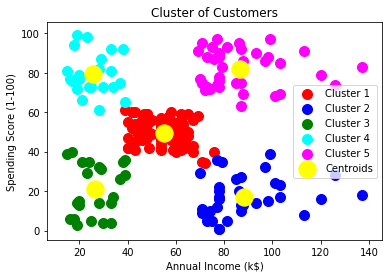

In [9]:
plt.scatter(X[y_predict == 0 , 0],X[y_predict == 0, 1], s=100 , c="red" , label = "Cluster 1")
plt.scatter(X[y_predict == 1 , 0],X[y_predict == 1, 1], s=100 , c="blue" , label = "Cluster 2")
plt.scatter(X[y_predict == 2 , 0],X[y_predict == 2, 1], s=100 , c="green" , label = "Cluster 3")
plt.scatter(X[y_predict == 3 , 0],X[y_predict == 3, 1], s=100 , c="cyan" , label = "Cluster 4")
plt.scatter(X[y_predict == 4 , 0],X[y_predict == 4, 1], s=100 , c="magenta" , label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s =300 , c="yellow", label="Centroids")
plt.title("Cluster of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

plt.scatter(X[y_predict == 0 , 0],X[y_predict == 0, 1], s=100 , c="red" , label = "")
plt.scatter(X[y_predict == 1 , 0],X[y_predict == 1, 1], s=100 , c="blue" , label = "")
plt.scatter(X[y_predict == 2 , 0],X[y_predict == 2, 1], s=100 , c="green" , label = "Cluster 3")
plt.scatter(X[y_predict == 3 , 0],X[y_predict == 3, 1], s=100 , c="cyan" , label = "Cluster 4")
plt.scatter(X[y_predict == 4 , 0],X[y_predict == 4, 1], s=100 , c="magenta" , label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s =300 , c="yellow", label="Centroids")
plt.title("Cluster of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Hierarichal

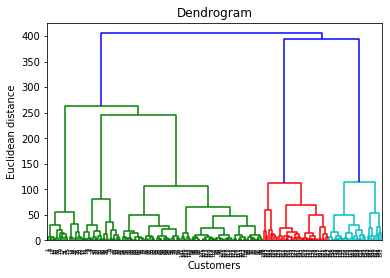

In [11]:
# using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters= 5, affinity= 'euclidean', linkage= 'ward')
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<function matplotlib.pyplot.show(*args, **kw)>

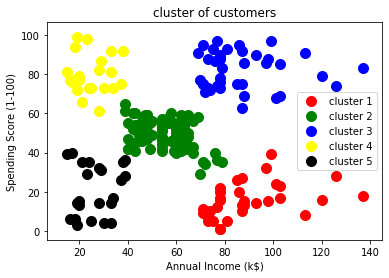

In [14]:
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1], s = 100, c = 'red', label='cluster 1' )
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1], s = 100, c = 'green', label='cluster 2' )
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1], s = 100, c = 'blue', label='cluster 3' )
plt.scatter(X[y_hc == 3,0],X[y_hc == 3,1], s = 100, c = 'yellow', label='cluster 4' )
plt.scatter(X[y_hc == 4,0],X[y_hc == 4,1], s = 100, c = 'black', label='cluster 5' )
plt.title('cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show